In [1]:
import pandas as pd
import numpy as np
import nltk
words = set(nltk.corpus.words.words())
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem.porter import PorterStemmer

from sklearn.model_selection import cross_val_score
import re
import codecs
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [2]:
data=pd.read_csv("../data/Eng_split_with_id.csv") ##
data=data[['_id','company_description','company_industry','company_sector']]

In [3]:
data['company_sector'].value_counts()

Technology                     158173
Professional Services          154421
Financial Services              48298
Retail and CPG                  48009
Industrials & Chemicals         38628
Healthcare and Lifesciences     37803
Media and Telecom               28820
Energy and Utilities            11383
Name: company_sector, dtype: int64

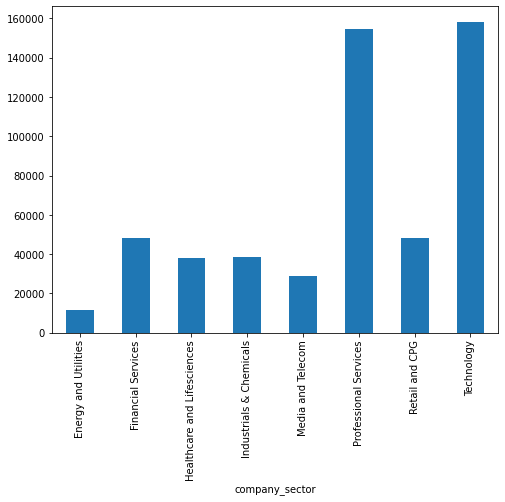

In [4]:
fig = plt.figure(figsize=(8,6))
data.groupby('company_sector').company_description.count().plot.bar()
plt.show()

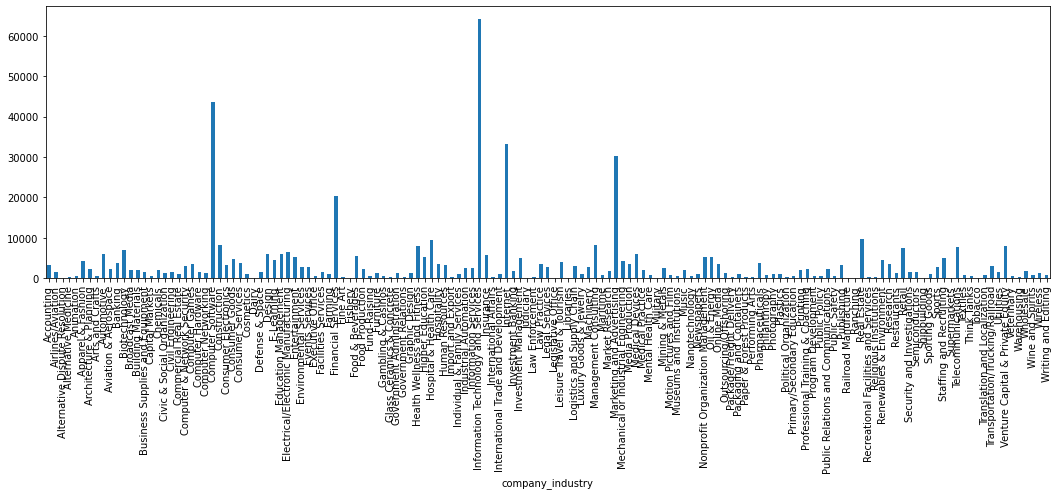

In [5]:
fig = plt.figure(figsize=(18,5))
data.groupby('company_industry').company_description.count().plot.bar()
plt.show()

In [6]:
data['company_industry'].value_counts()

Information Technology and Services    64089
Computer Software                      43560
Internet                               33201
Marketing and Advertising              30265
Financial Services                     20419
                                       ...  
Tobacco                                   62
Alternative Dispute Resolution            52
Ranching                                  37
Judiciary                                 29
Legislative Office                        18
Name: company_industry, Length: 147, dtype: int64

In [7]:
def get_bar_and_percent(df,column_name,y_label,x_label):
    
    print("\n\n ****** Percentage Wise Variable Distribution ********* \n")
    print(df[column_name].value_counts(normalize=True)*100)   # percentage wise
    if df[column_name].nunique()<70:
        print("\n\n ****** Bar Graph for - "+column_name+" ******\n")
        fig = plt.figure(figsize = (15, 5))
        # creating the bar plot
        df[column_name].value_counts(normalize=False).plot.bar(title = column_name) 
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.show()
    else:
        c = df[column_name].nunique()
        print("\n ------------ Number of Unique entries: "+str(c)+"  are too large to display ------------\n")
        print("\n ------------  Single Random Row  ------------\n", df[column_name][0])
    
    return True

In [8]:
get_bar_and_percent(data,"company_industry","Frequency","Categories in company_industry")



 ****** Percentage Wise Variable Distribution ********* 

Information Technology and Services    12.195001
Computer Software                       8.288696
Internet                                6.317562
Marketing and Advertising               5.758893
Financial Services                      3.885374
                                         ...    
Tobacco                                 0.011798
Alternative Dispute Resolution          0.009895
Ranching                                0.007040
Judiciary                               0.005518
Legislative Office                      0.003425
Name: company_industry, Length: 147, dtype: float64

 ------------ Number of Unique entries: 147  are too large to display ------------


 ------------  Single Random Row  ------------
 Information Technology and Services


True



 ****** Percentage Wise Variable Distribution ********* 

Technology                     30.097520
Professional Services          29.383581
Financial Services              9.190254
Retail and CPG                  9.135262
Industrials & Chemicals         7.350224
Healthcare and Lifesciences     7.193241
Media and Telecom               5.483935
Energy and Utilities            2.165983
Name: company_sector, dtype: float64


 ****** Bar Graph for - company_sector ******



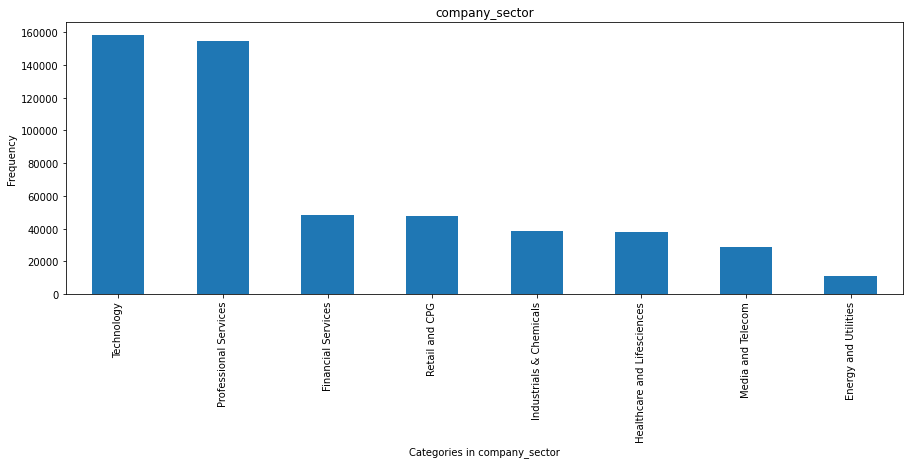

True

In [9]:
get_bar_and_percent(data,"company_sector","Frequency","Categories in company_sector")

In [10]:
len(data)

525535

In [11]:
import math
def data_Splitter(df,column_name,data_len):
    print(len(df))
    data=pd.DataFrame()
    for i in df[column_name].unique():
        i_df = df.loc[df[column_name]==i]
        val = math.ceil((len(i_df)/len(df))*data_len)
        i_df = i_df.sample(n=val)
        data=data.append(i_df)
    data.reset_index(drop=True,inplace=True)
    return data

In [12]:
smaller_data = data_Splitter(data,'company_industry',50000)

525535


In [13]:
smaller_data.shape

(50074, 4)

In [14]:
smaller_data

,_id,company_description,company_industry,company_sector
0,5ba5edf17c86660ac1277389,"Founded in 2005 by Art Howe, CIU Networks INC ...",Information Technology and Services,Technology
1,5ba8ab4a7c866639437d4223,Pulling your hair out over mindless call after...,Information Technology and Services,Technology
2,5ba5ef497c86660ac12a31f6,Creative Facility Design can recommend alterna...,Information Technology and Services,Technology
3,5ba70d9540437e5d2c69af56,PVM Innvensys Pvt Ltd is an information techno...,Information Technology and Services,Technology
4,5ba5f2e77c86660ac13009ea,Eleview International Inc is an information te...,Information Technology and Services,Technology
...,...,...,...,...
50069,5c3b0525d55ae49f1b7d4047,Office of Rep. James P. McGovern is a represen...,Legislative Office,Professional Services
50070,5c3b06cdd55ae49f1b7fb887,The Joint Economic Committee (JEC) was created...,Legislative Office,Professional Services
50071,5c3b0402d55ae49f1b7bb343,The International Court of Justice (ICJ) is th...,Judiciary,Professional Services
50072,5c3b06d7d55ae49f1b7fc803,Middle district of florida web site provides i...,Judiciary,Professional Services


In [32]:
# smaller_data.to_csv("50k_data_crunchbase.csv",index=False)
smaller_data.to_excel("../data/50k_data_crunchbase.xlsx",index=False)

In [15]:
train, test = train_test_split(smaller_data, test_size=0.2)

In [16]:
len(train),len(test)

(40059, 10015)

In [17]:
#removing non-letter symbols and converting text in 'converted_text' to lowercase 
train['company_description'] = train['company_description'].apply(lambda x: "".join(re.sub(r"[^A-Za-z\s]", '',str(x))))
test['company_description'] = test['company_description'].apply(lambda x: "".join(re.sub(r"[^A-Za-z\s]",'',str(x))))
train['company_description'] = train['company_description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
test['company_description'] = test['company_description'].apply(lambda x: " ".join(x.lower() for x in x.split()))

/home/slintel/bert/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/slintel/bert/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/slintel/bert/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [18]:
#Removing punctuations
#adding characters list which needs to remove that is PUNCTUATION
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%",'/','<','>','br','�','^','XX','XXXX','xxxx','xx']
#removing extra characters
train['company_description'] = train['company_description'].apply(lambda x: " ".join(x for x in x.split() if x not in punc))
test['company_description'] = test['company_description'].apply(lambda x: " ".join(x for x in x.split() if x not in punc))

/home/slintel/bert/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/slintel/bert/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
#removal of stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
train['company_description'] = train['company_description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
test['company_description'] = test['company_description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

/home/slintel/bert/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/slintel/bert/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [20]:
#common words removal
freq_train = pd.Series(' '.join(train['company_description']).split()).value_counts()[:10]
freq_test = pd.Series(' '.join(test['company_description']).split()).value_counts()[:10]
freq_train = list(freq_train.index)
train['company_description'] = train['company_description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_train))
freq_test = list(freq_test.index)
test['company_description'] = test['company_description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_test))

/home/slintel/bert/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/slintel/bert/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [21]:
#rare words removal
freq_train_rare = pd.Series(' '.join(train['company_description']).split()).value_counts()[-10:]
freq_train_rare = list(freq_train_rare.index)
train['company_description'] = train['company_description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_train_rare))
freq_test_rare = pd.Series(' '.join(test['company_description']).split()).value_counts()[-10:]
freq_test_rare = list(freq_test_rare.index)
test['company_description'] = test['company_description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_test_rare))

/home/slintel/bert/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/slintel/bert/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [22]:
#STEMMING
st = PorterStemmer()
train['company_description']=train['company_description'].apply(lambda x: " ".join([st.stem(w) for w in x.split()]))
test['company_description']=test['company_description'].apply(lambda x: " ".join([st.stem(w) for w in x.split()]))

/home/slintel/bert/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/slintel/bert/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
def x_data(dataset):
    
    #filling missing values in 'Consumer-disputes with the mode'
    values = {'Consumer-disputes':'No'}
    dataset = dataset.fillna(value=values)
    
    #filling missing values in 'Company response with a new category'
    values1 = {'Company-response':'Unknown'}
    dataset = dataset.fillna(value=values1)
    
    
    a = dataset.describe()
    
    #drop the column having complaint-ID as it is of no importance
    dataset=dataset.drop(['Complaint-ID'], axis=1)
    dataset=dataset.drop(['Consumer-complaint-summary'], axis=1)
    
    #making a new feature delay with the help of two dates feature to know the date difference
    difference= []
    for i in range(len(dataset)):
        a = dataset['Date-sent-to-company'][i].split('/')
        b = dataset['Date-received'][i].split('/')
        difference.append(int(a[2])*365 + int(a[0])*30 + int(a[1]) - int(b[2])*365 -int(b[0])*30 -int(b[1]))
    dataset['delayed'] = difference
    dataset=dataset.drop(['Date-sent-to-company'], axis=1)
    dataset=dataset.drop(['Date-received'], axis=1)
    
    
    X = dataset.loc[:,['Transaction-Type','Complaint-reason','Company-response','Consumer-disputes','delayed','converted_text','convertion_language']]
    
    #LabelEncoding the categorical features
    labelencoder = LabelEncoder()
    labelencoder.fit(X.iloc[:,0].values)
    X.iloc[:,0]=labelencoder.transform(X.iloc[:,0])
    labelencoder.fit(X.iloc[:,2].values)
    X.iloc[:,2]=labelencoder.transform(X.iloc[:,2])
    labelencoder.fit(X.iloc[:,3].values)
    X.iloc[:,3]=labelencoder.transform(X.iloc[:,3])
    bhau=X.head()
    
    reason = X.iloc[:,[1]]
    summary =X.iloc[:,[5]] 
    conv_lang=X.iloc[:,[6]]
    X=X.drop(['Complaint-reason'], axis=1)
    X=X.drop(['converted_text'], axis=1)
    #X=X.drop(['Consumer-complaint-summary'], axis=1)
    X=X.drop(['convertion_language'], axis=1)
    bhau2=X.head()
    
    onehotencoder = OneHotEncoder(categorical_features = [0,1])
    X = onehotencoder.fit_transform(X).toarray()
    
    
    
    
    
    sc_x = MinMaxScaler()
    X = sc_x.fit_transform(X)
    return X, reason, summary, conv_lang

In [24]:
#convert the target variable into LabelEncoder
y_train = train.loc[:,['company_industry']]
labelencoder1 = LabelEncoder()
labelencoder1.fit(y_train.values)
y_train=labelencoder1.transform(y_train)

/home/slintel/bert/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [26]:
#converting the industry into list
res_train = train['company_industry'].tolist()
res_test = test['company_industry'].tolist()

#converting the description into list
sum_train = train['company_description'].tolist()
sum_test = test['company_description'].tolist()

#adding train and test list for Industry
lis = res_train + res_test
#adding train and test list for Description
lis_summary =sum_train+sum_test

In [27]:
#Calling TFID vectorizer
tfv = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',stop_words= 'english',ngram_range=(1,1))
# Fitting TF-IDF to both training and test sets (semi-supervised learning)
tfv.fit(lis)
print(tfv.vocabulary_)
print(tfv.idf_)

xtrain_tfv =  tfv.transform(res_train).toarray()
xtest_tfv = tfv.transform(res_test).toarray()
type(xtrain_tfv)

{'gambling': 78, 'casinos': 23, 'information': 93, 'technology': 195, 'services': 182, 'marketing': 117, 'advertising': 2, 'internet': 97, 'broadcast': 18, 'media': 121, 'telecommunications': 196, 'real': 167, 'estate': 60, 'industrial': 92, 'automation': 12, 'venture': 208, 'capital': 21, 'private': 157, 'equity': 59, 'oil': 138, 'energy': 52, 'food': 73, 'beverages': 16, 'banking': 15, 'mechanical': 120, 'engineering': 54, 'construction': 34, 'insurance': 95, 'consumer': 36, 'goods': 81, 'import': 90, 'export': 63, 'accounting': 0, 'individual': 91, 'family': 65, 'computer': 32, 'software': 185, 'education': 48, 'management': 112, 'legal': 104, 'consulting': 35, 'printing': 156, 'financial': 69, 'human': 89, 'resources': 175, 'health': 85, 'wellness': 211, 'fitness': 72, 'farming': 66, 'mining': 127, 'metals': 125, 'hospital': 87, 'care': 22, 'games': 79, 'fund': 76, 'raising': 165, 'professional': 160, 'training': 202, 'coaching': 29, 'biotechnology': 17, 'retail': 177, 'renewables'

numpy.ndarray

In [29]:
x_train = np.concatenate((train,xtrain_tfv,xtrain_tfv_sum),axis = 1)
x_test = np.concatenate((test,xtest_tfv,xtest_tfv_sum),axis = 1)


NameError: name 'xtrain_tfv_sum' is not defined